# Plot validators novsl and vsl

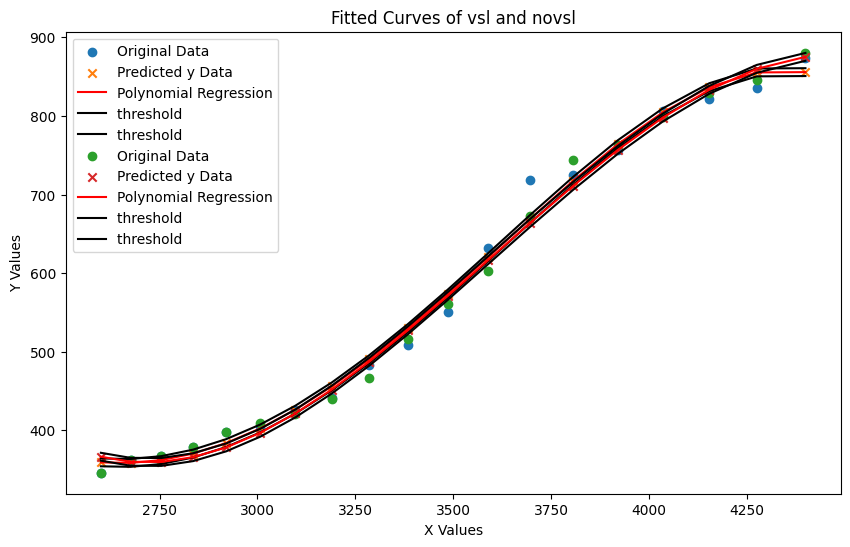

In [7]:
import matplotlib.pyplot as plt
from global_settings import vfs
import pickle
plt.figure(figsize=(10, 6))
# vsl = validator_controller_vsl
# nvsl = validator_controller_novsl

# Uncomment to read the validator_controller object from file to plot curves
vsl = pickle.load(open("vc_vsl_loop-1-20240530-214003.pkl", "rb"))
nvsl = pickle.load(open("vc_novsl_loop-1-20240530-214054.pkl", "rb"))



# Plot for vsl
#for controller in [validator_controller_vsl,validator_controller_novsl]:
# controller= validator_controller_novsl
#    print(f"X values and Y values {controller.x_values}{controller.y_values} predicted values {controller.predicted_values}")
#    plt.scatter(controller.x_values, controller.y_values, label=f'Original Data ')
#    plt.scatter(controller.x_values, controller.predicted_values, label=f'Predicted y Data ', marker='x')
#    plt.plot(controller.fitted_curve[2], controller.fitted_curve[1], color='red', label=f'Polynomial Regression')
#    plt.plot(controller.fitted_curve[2], controller.fitted_curve[1] + vfs["threshold_y_fitting"], color='black', label=f'threshold ')
#    plt.plot(controller.fitted_curve[2], controller.fitted_curve[1] - vfs["threshold_y_fitting"], color='black', label=f'threshold ')

plt.scatter(vsl.x_values, vsl.y_values, label=f'Original Data ')
plt.scatter(vsl.x_values, vsl.predicted_values, label=f'Predicted y Data ', marker='x')
plt.plot(vsl.fitted_curve[2], vsl.fitted_curve[1], color='red', label=f'Polynomial Regression')
plt.plot(vsl.fitted_curve[2], vsl.fitted_curve[1] + vfs["threshold_y_fitting"], color='black', label=f'threshold ')
plt.plot(vsl.fitted_curve[2], vsl.fitted_curve[1] - vfs["threshold_y_fitting"], color='black', label=f'threshold ')

plt.scatter(nvsl.x_values, nvsl.y_values, label=f'Original Data ')
plt.scatter(nvsl.x_values, nvsl.predicted_values, label=f'Predicted y Data ', marker='x')
plt.plot(nvsl.fitted_curve[2], nvsl.fitted_curve[1], color='red', label=f'Polynomial Regression')
plt.plot(nvsl.fitted_curve[2], nvsl.fitted_curve[1] + vfs["threshold_y_fitting"], color='black', label=f'threshold ')
plt.plot(nvsl.fitted_curve[2], nvsl.fitted_curve[1] - vfs["threshold_y_fitting"], color='black', label=f'threshold ')

plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Fitted Curves of vsl and novsl')
plt.legend()
plt.show()